In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
trades = pd.read_csv('../data/2023-06-11/trades.csv')

trades.index = pd.to_datetime(trades.DATE+' '+trades.TIME_M)
del trades['DATE'], trades['TIME_M']

In [3]:
quotes = pd.read_csv('../data/2023-06-11/quotes.csv')

quotes.index = pd.to_datetime(quotes.DATE+' '+quotes.TIME_M)
del quotes['DATE'], quotes['TIME_M']

In [4]:
trades, quotes = trades[trades.EX=='Q'], quotes[quotes.EX=='Q']

In [5]:
trades = trades[trades.index.to_series().dt.hour.apply(lambda x : 10<=x<=14)]

<Axes: >

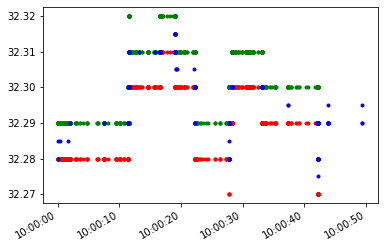

In [6]:
quotes.BID.where(quotes.BID!=0)[quotes.index>=trades.index.min()].head(1400).plot(style='.',color='red')
quotes.ASK.where(quotes.ASK!=0)[quotes.index>=trades.index.min()].head(1400).plot(style='.',color='green')
trades.PRICE.head(200).plot(style='.',color='blue')

In [7]:
for key in ('BID','BIDSIZ','ASK','ASKSIZ'):
    quotes[key] = quotes[key].where(quotes[key]!=0).groupby(quotes.EX).ffill()

<Axes: >

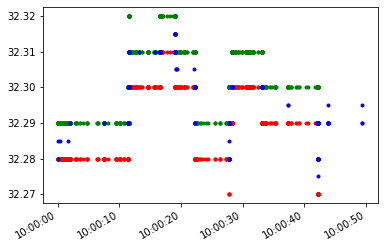

In [8]:
quotes.BID.where(quotes.BID!=0)[quotes.index>=trades.index.min()].head(1400).plot(style='.',color='red')
quotes.ASK.where(quotes.ASK!=0)[quotes.index>=trades.index.min()].head(1400).plot(style='.',color='green')
trades.PRICE.head(200).plot(style='.',color='blue')

In [9]:
quotes['MID'] = (quotes.BID+quotes.ASK)/2

<Axes: >

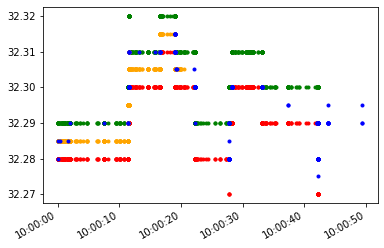

In [10]:
quotes.BID.where(quotes.BID!=0)[quotes.index>=trades.index.min()].head(1400).plot(style='.',color='red')
quotes.ASK.where(quotes.ASK!=0)[quotes.index>=trades.index.min()].head(1400).plot(style='.',color='green')
quotes.MID.where(quotes.MID!=0)[quotes.index>=trades.index.min()].head(700).plot(style='.',color='orange')
trades.PRICE.head(200).plot(style='.',color='blue')

In [11]:
# toplevels = quotes[['EX','BID','ASK']].melt(id_vars=['EX'],value_vars=['BID','ASK'],ignore_index=False)
# toplevels = toplevels[toplevels.value!=0].sort_index()
# toplevels['time'] = toplevels.index

In [12]:
# df=pd.merge_asof(trades,toplevels,\
#               left_index=True,right_index=True,left_by=['EX','PRICE'],right_by=['EX','value'],suffixes=('_trades','_quotes'))
# del trades,quotes,toplevels

In [13]:
df = pd.merge_asof(trades,quotes,left_index=True,right_index=True)

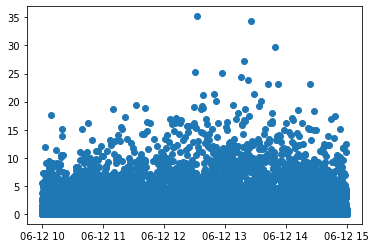

In [14]:
plt.scatter(df.index, df.index.to_series().diff().shift(-1).dt.total_seconds())

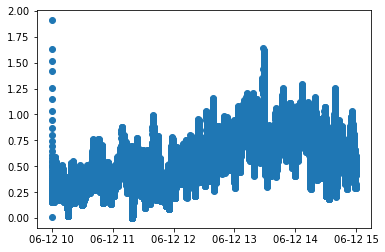

In [15]:
plt.scatter(df.index, df.index.to_series().diff().shift(-1).dt.total_seconds().ewm(alpha=0.01).mean())

<Axes: >

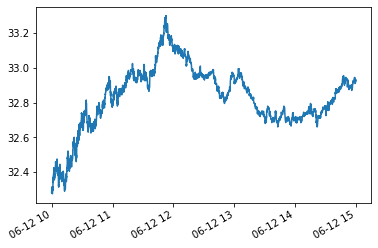

In [16]:
df['PRICE'].plot()

In [17]:
df

,EX_x,SYM_ROOT_x,SYM_SUFFIX_x,TR_SCOND,SIZE,PRICE,TR_STOP_IND,TR_CORR,TR_SEQNUM,TR_ID,...,ASK,ASKSIZ,QU_COND,QU_SEQNUM,NATBBO_IND,QU_CANCEL,QU_SOURCE,SYM_ROOT_y,SYM_SUFFIX_y,MID
2023-06-12 10:00:00.075986899,Q,INTC,NaN,@,100,32.285,NaN,0,793583,9576,...,32.29,11.0,R,11293550,4,NaN,N,INTC,NaN,32.285
2023-06-12 10:00:00.083885521,Q,INTC,NaN,@ I,17,32.280,NaN,0,793609,9577,...,32.29,11.0,R,11296338,4,NaN,N,INTC,NaN,32.285
2023-06-12 10:00:00.378037429,Q,INTC,NaN,@F I,7,32.285,NaN,0,795058,9578,...,32.29,16.0,R,11297513,4,NaN,N,INTC,NaN,32.285
2023-06-12 10:00:01.702957793,Q,INTC,NaN,@,100,32.285,NaN,0,795965,9579,...,32.29,16.0,R,11318430,4,NaN,N,INTC,NaN,32.285
2023-06-12 10:00:02.086163817,Q,INTC,NaN,@F I,2,32.290,NaN,0,796044,9580,...,32.29,6.0,R,11320872,2,NaN,N,INTC,NaN,32.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12 14:59:59.118220501,Q,INTC,NaN,@F,400,32.930,NaN,0,4746737,48776,...,32.93,2.0,R,64364845,0,NaN,N,INTC,NaN,32.925
2023-06-12 14:59:59.118224483,Q,INTC,NaN,@F,100,32.930,NaN,0,4746738,48777,...,32.93,2.0,R,64364846,2,NaN,N,INTC,NaN,32.925
2023-06-12 14:59:59.118227097,Q,INTC,NaN,@F I,82,32.930,NaN,0,4746739,48778,...,32.93,2.0,R,64364846,2,NaN,N,INTC,NaN,32.925
2023-06-12 14:59:59.248877594,Q,INTC,NaN,@,100,32.930,NaN,0,4746748,48779,...,32.94,26.0,R,64365024,2,NaN,N,INTC,NaN,32.930


In [18]:
import sys
sys.path.append('../code')
import hybrid_hawkes_exp_stochastic_em

n_events = 1  # number of event types, $d_e$
n_states = 1#2  # number of possible states, $d_x$
events_labels = [0]  # names of the event types
states_labels = [0]#['1', '2']  # names of the states


times = (df.index.to_series() - datetime.datetime(1970,1,1)).dt.total_seconds()
events = pd.Series(index=times.index, data=0)
states = pd.Series(index=times.index, data=0)

times,events,states = map(lambda x : x.values, (times,events,states))

time_start=int(times.min()/60/60)*60*60#1672740000
time_end=(int(times.max()/60/60)+1)*60*60#1672754400
assert (times>time_start).all()
assert (times<time_end).all()

print(hybrid_hawkes_exp_stochastic_em.stochastic_em(times, events, states, time_start, time_end, n_events, epochs=50))


model = mpoints.hybrid_hawkes_exp.HybridHawkesExp(n_events, n_states, events_labels, states_labels)

result, _, _ = model.estimate_hawkes_parameters(times, events, states, time_start=time_start, time_end=time_end)
print(result)
print(model.array_to_parameters(result.x, n_events, n_states))

[1.]
[[1.]]
[[1.]]


39205it [00:06, 5754.04it/s]


[1.42541361]
[[0.70882284]]
[[9.27524766e+12]]


39205it [00:09, 4290.50it/s]


[1.96729469]
[[0.71732313]]
[[9.27524766e+12]]


39205it [00:24, 1585.86it/s]


[2.55106721]
[[0.72423621]]
[[9.27524766e+12]]


39205it [00:11, 3308.67it/s]


[3.20788222]
[[0.72997516]]
[[9.27524766e+12]]


39205it [00:06, 5860.81it/s]


[3.96403542]
[[0.73478753]]
[[9.27524766e+12]]


39205it [00:06, 5918.18it/s]


[4.84640636]
[[0.73884322]]
[[9.27524766e+12]]


39205it [00:06, 6018.58it/s]


[5.88482437]
[[0.7422691]]
[[9.27524766e+12]]


39205it [00:06, 6393.26it/s]


[7.11363463]
[[0.74516516]]
[[9.27524766e+12]]


39205it [00:06, 6114.58it/s]


[8.57308388]
[[0.747613]]
[[9.27524766e+12]]


39205it [00:06, 5920.87it/s]


[10.31076004]
[[0.74968063]]
[[9.27524766e+12]]


39205it [00:06, 6507.27it/s]


[12.38320617]
[[0.75142554]]
[[9.27524766e+12]]


39205it [00:07, 5334.57it/s]


[14.85779356]
[[0.75289657]]
[[9.27524766e+12]]


39205it [00:06, 6421.60it/s]


[17.81492993]
[[0.75413541]]
[[9.27524766e+12]]


39205it [00:06, 6428.37it/s]


[21.35068223]
[[0.75517767]]
[[9.27524766e+12]]


39205it [00:07, 5346.15it/s]


[25.57990314]
[[0.7560537]]
[[9.27524766e+12]]


39205it [00:34, 1122.09it/s]


[30.63996506]
[[0.75678939]]
[[9.27524766e+12]]


39205it [00:13, 2923.16it/s]


[36.69522396]
[[0.75740675]]
[[9.27524766e+12]]


39205it [00:12, 3213.40it/s]


[43.94235891]
[[0.75792446]]
[[9.27524766e+12]]


39205it [00:11, 3280.16it/s]


[52.61676086]
[[0.75835836]]
[[9.27524766e+12]]


39205it [00:09, 4215.88it/s]


[63.00017866]
[[0.75872181]]
[[9.27524766e+12]]


39205it [00:09, 3939.00it/s]


[75.42987052]
[[0.75902614]]
[[9.27524766e+12]]


39205it [00:09, 4293.53it/s]


[90.30955845]
[[0.75928085]]
[[9.27524766e+12]]


39205it [00:08, 4477.77it/s]


[108.12254138]
[[0.75949398]]
[[9.27524766e+12]]


39205it [00:08, 4672.10it/s]


[129.44739296]
[[0.75967225]]
[[9.27524766e+12]]


39205it [00:09, 4004.50it/s]


[154.97675388]
[[0.75982135]]
[[9.27524766e+12]]


39205it [00:22, 1723.82it/s]


[185.53982918]
[[0.75994601]]
[[9.27524766e+12]]


39205it [00:13, 2818.67it/s]


[222.12932122]
[[0.76005023]]
[[9.27524766e+12]]


39205it [00:09, 4265.97it/s]


[265.93367304]
[[0.76013734]]
[[9.27524766e+12]]


39205it [00:09, 4111.42it/s]


[318.37566958]
[[0.76021015]]
[[9.27524766e+12]]


39205it [00:10, 3700.77it/s]


[381.15865034]
[[0.760271]]
[[9.27524766e+12]]


39205it [00:08, 4626.03it/s]


[456.32183462]
[[0.76032184]]
[[9.27524766e+12]]


39205it [00:09, 4201.48it/s]


[546.30655628]
[[0.76036433]]
[[9.27524766e+12]]


39205it [00:08, 4397.45it/s]


[654.03555932]
[[0.76039982]]
[[9.27524766e+12]]


39205it [00:07, 5022.56it/s]


[783.00792996]
[[0.76042948]]
[[9.27524766e+12]]


39205it [00:07, 5106.32it/s]


[937.41274852]
[[0.76045426]]
[[9.27524766e+12]]


39205it [00:07, 5118.16it/s]


[1122.26515257]
[[0.76047496]]
[[9.27524766e+12]]


39205it [00:07, 4998.34it/s]


[1343.56923091]
[[0.76049226]]
[[9.27524766e+12]]


39205it [00:08, 4594.62it/s]


[1608.51303902]
[[0.7605067]]
[[9.27524766e+12]]


39205it [00:07, 5048.55it/s]


[1925.70207033]
[[0.76051877]]
[[9.27524766e+12]]


39205it [00:07, 5079.55it/s]


[2305.43876649]
[[0.76052885]]
[[9.27524766e+12]]


39205it [00:07, 5316.36it/s]


[2760.0571453]
[[0.76053727]]
[[9.27524766e+12]]


39205it [00:08, 4833.36it/s]


[3304.3234151]
[[0.76054431]]
[[9.27524766e+12]]


39205it [00:08, 4630.89it/s]


[3955.91558787]
[[0.76055018]]
[[9.27524766e+12]]


39205it [00:08, 4513.22it/s]


[4735.99766891]
[[0.76055509]]
[[9.27524766e+12]]


39205it [00:07, 5014.33it/s]


[5669.90707325]
[[0.76055919]]
[[9.27524766e+12]]


39205it [00:06, 5767.61it/s]


[6787.97759618]
[[0.76056262]]
[[9.27524766e+12]]


39205it [00:07, 5327.07it/s]


[8126.52466855]
[[0.76056548]]
[[9.27524766e+12]]


39205it [00:06, 6010.22it/s]


[9729.02489817]
[[0.76056787]]
[[9.27524766e+12]]


39205it [00:06, 5660.06it/s]


[11647.5282095]
[[0.76056986]]
[[9.27524766e+12]]


39205it [00:07, 5399.33it/s]


(array([13944.34844847]), array([[0.76057153]]), array([[9.27524766e+12]]))


NameError: name 'mpoints' is not defined

In [58]:
for _ in range(10):
    model = mpoints.hybrid_hawkes_exp.HybridHawkesExp(n_events, n_states, events_labels, states_labels)

    result, _, _ = model.estimate_hawkes_parameters(times, events, states, time_start=time_start, time_end=time_end)
    print(result)
    print(model.array_to_parameters(result.x, n_events, n_states))

   message: Multiple messages because parallel estimation
   success: False
    status: 3
       fun: -237597.70073881373
         x: [ 4.670e-01  3.293e+03  3.695e+03]
       nit: 28
 successes: [False]
  statuses: [3]
  messages: ['Max. number of function evaluations reached']
      jacs: [array([ 4.516e-01,  1.258e+00, -6.276e+00])]
     hesss: []
      nfev: 101
(array([0.46696058]), array([[[3292.91954518]]]), array([[[3694.60183239]]]))
   message: Multiple messages because parallel estimation
   success: False
    status: 3
       fun: -271169.1206766882
         x: [ 5.940e-01  5.553e+04  7.542e+04]
       nit: 32
 successes: [False]
  statuses: [3]
  messages: ['Max. number of function evaluations reached']
      jacs: [array([-3.237e-02,  6.313e-03, -1.103e-02])]
     hesss: []
      nfev: 100
(array([0.5939957]), array([[[55528.14407971]]]), array([[[75422.96568963]]]))
   message: Multiple messages because parallel estimation
   success: False
    status: 3
       fun: -271

In [12]:
import hybrid_hawkes_exp_em

In [18]:
n_events = 1  # number of event types, $d_e$
n_states = 1#2  # number of possible states, $d_x$
events_labels = [0]  # names of the event types
states_labels = [0]#['1', '2']  # names of the states


times = (df.index.to_series() - datetime.datetime(1970,1,1)).dt.total_seconds()
events = np.sign(df.PRICE-df.MID).astype(int)+1
states = pd.Series(index=times.index, data=0)

times,events,states = map(lambda x : x[:10], (times,events,states))

time_start=int(times.min()/60/60)*60*60#1672740000
time_end=(int(times.max()/60/60)+1)*60*60#1672754400
assert (times>time_start).all()
assert (times<time_end).all()

hybrid_hawkes_exp_em.estimate_hawkes_parameters(times, events, states, time_start, time_end)

  0%|                                                                                                                                                                                                                                                                         | 0/50 [00:00<?, ?it/s]

-25.902744 (array([1., 1., 1.]), array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]]), array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]]))


  2%|█████▏                                                                                                                                                                                                                                                           | 1/50 [00:25<21:12, 25.96s/it]

-27.275738 (Array([1.0466172, 1.0420513, 1.0386871], dtype=float32), Array([[1.        , 0.99700266, 0.99953043],
       [0.9962757 , 0.99559927, 0.996531  ],
       [1.        , 1.        , 0.9874844 ]], dtype=float32), Array([[1.0000097, 1.0021572, 1.0029414],
       [1.0000097, 1.0021572, 1.0029414],
       [1.0000097, 1.0021572, 1.0029414]], dtype=float32))


  4%|██████████▎                                                                                                                                                                                                                                                      | 2/50 [00:35<13:01, 16.28s/it]

-28.656754 (Array([1.0932343, 1.0842674, 1.0775992], dtype=float32), Array([[1.        , 0.9940076 , 0.9990635 ],
       [0.99255645, 0.9912043 , 0.9930693 ],
       [1.        , 1.        , 0.9748759 ]], dtype=float32), Array([[1.0000193, 1.0043012, 1.0058093],
       [1.0000193, 1.0043012, 1.0058093],
       [1.0000193, 1.0043012, 1.0058093]], dtype=float32))


  6%|███████████████▍                                                                                                                                                                                                                                                 | 3/50 [00:45<10:25, 13.31s/it]

-30.04538 (Array([1.1398519, 1.1266361, 1.1167238], dtype=float32), Array([[1.        , 0.9910148 , 0.998599  ],
       [0.98884225, 0.9868153 , 0.9896147 ],
       [1.        , 1.        , 0.9621691 ]], dtype=float32), Array([[1.000029 , 1.0064318, 1.0086071],
       [1.000029 , 1.0064318, 1.0086071],
       [1.000029 , 1.0064318, 1.0086071]], dtype=float32))


  8%|████████████████████▌                                                                                                                                                                                                                                            | 4/50 [00:53<08:45, 11.41s/it]

-31.441204 (Array([1.1864702, 1.1691471, 1.1560497], dtype=float32), Array([[1.        , 0.9880242 , 0.99813694],
       [0.9851331 , 0.9824322 , 0.9861671 ],
       [1.        , 1.        , 0.9493584 ]], dtype=float32), Array([[1.0000386, 1.0085489, 1.0113393],
       [1.0000386, 1.0085489, 1.0113393],
       [1.0000386, 1.0085489, 1.0113393]], dtype=float32))


 10%|█████████████████████████▋                                                                                                                                                                                                                                       | 5/50 [01:02<07:51, 10.48s/it]

-32.843872 (Array([1.2330885, 1.2117903, 1.195566 ], dtype=float32), Array([[1.        , 0.985036  , 0.9976773 ],
       [0.98142916, 0.9780551 , 0.9827261 ],
       [1.        , 1.        , 0.9364377 ]], dtype=float32), Array([[1.0000483, 1.0106525, 1.0140092],
       [1.0000483, 1.0106525, 1.0140092],
       [1.0000483, 1.0106525, 1.0140092]], dtype=float32))


 12%|██████████████████████████████▊                                                                                                                                                                                                                                  | 6/50 [01:12<07:35, 10.35s/it]

-34.253063 (Array([1.2797073, 1.2545571, 1.2352633], dtype=float32), Array([[1.        , 0.9820502 , 0.99722   ],
       [0.97773033, 0.9736842 , 0.9792916 ],
       [1.        , 1.        , 0.9234011 ]], dtype=float32), Array([[1.0000579, 1.012743 , 1.0166202],
       [1.0000579, 1.012743 , 1.0166202],
       [1.0000579, 1.012743 , 1.0166202]], dtype=float32))


 14%|███████████████████████████████████▉                                                                                                                                                                                                                             | 7/50 [01:20<06:49,  9.53s/it]

-35.66848 (Array([1.3263265, 1.2974396, 1.275132 ], dtype=float32), Array([[1.        , 0.9790668 , 0.99676466],
       [0.9740366 , 0.96931934, 0.9758635 ],
       [1.        , 1.        , 0.9102422 ]], dtype=float32), Array([[1.0000676, 1.0148201, 1.019175 ],
       [1.0000676, 1.0148201, 1.019175 ],
       [1.0000676, 1.0148201, 1.019175 ]], dtype=float32))


 16%|█████████████████████████████████████████                                                                                                                                                                                                                        | 8/50 [01:31<06:57,  9.93s/it]

-37.08985 (Array([1.3729463, 1.3404305, 1.3151634], dtype=float32), Array([[1.        , 0.9760857 , 0.9963116 ],
       [0.97034794, 0.96496063, 0.97244155],
       [1.        , 1.        , 0.8969544 ]], dtype=float32), Array([[1.0000771, 1.016884 , 1.0216767],
       [1.0000771, 1.016884 , 1.0216767],
       [1.0000771, 1.016884 , 1.0216767]], dtype=float32))


 18%|██████████████████████████████████████████████▎                                                                                                                                                                                                                  | 9/50 [01:44<07:28, 10.93s/it]

-38.516937 (Array([1.4195663, 1.3835233, 1.3553497], dtype=float32), Array([[1.        , 0.97310704, 0.99586064],
       [0.96666443, 0.9606082 , 0.9690257 ],
       [1.        , 1.        , 0.88353074]], dtype=float32), Array([[1.0000867, 1.018935 , 1.0241277],
       [1.0000867, 1.018935 , 1.0241277],
       [1.0000867, 1.018935 , 1.0241277]], dtype=float32))


 20%|███████████████████████████████████████████████████▏                                                                                                                                                                                                            | 10/50 [01:54<07:07, 10.68s/it]

-39.949512 (Array([1.4661866, 1.4267119, 1.3956834], dtype=float32), Array([[1.        , 0.9701308 , 0.9954118 ],
       [0.96298605, 0.95626193, 0.9656158 ],
       [1.        , 1.        , 0.8699639 ]], dtype=float32), Array([[1.0000962, 1.0209723, 1.0265304],
       [1.0000962, 1.0209723, 1.0265304],
       [1.0000962, 1.0209723, 1.0265304]], dtype=float32))


 22%|████████████████████████████████████████████████████████▎                                                                                                                                                                                                       | 11/50 [02:02<06:24,  9.86s/it]

-41.387394 (Array([1.5128075, 1.4699912, 1.4361576], dtype=float32), Array([[1.        , 0.967157  , 0.99496496],
       [0.95931286, 0.95192206, 0.9622117 ],
       [1.        , 1.        , 0.85624605]], dtype=float32), Array([[1.0001056, 1.0229967, 1.0288873],
       [1.0001056, 1.0229967, 1.0288873],
       [1.0001056, 1.0229967, 1.0288873]], dtype=float32))


 24%|█████████████████████████████████████████████████████████████▍                                                                                                                                                                                                  | 12/50 [02:14<06:39, 10.51s/it]

-42.830402 (Array([1.5594287, 1.5133556, 1.4767655], dtype=float32), Array([[1.        , 0.9641857 , 0.9945201 ],
       [0.95564455, 0.9475883 , 0.9588134 ],
       [1.        , 1.        , 0.8423693 ]], dtype=float32), Array([[1.0001149, 1.0250081, 1.0312002],
       [1.0001149, 1.0250081, 1.0312002],
       [1.0001149, 1.0250081, 1.0312002]], dtype=float32))


 26%|██████████████████████████████████████████████████████████████████▌                                                                                                                                                                                             | 13/50 [02:26<06:44, 10.94s/it]

-44.278393 (Array([1.6060505, 1.5568011, 1.5175012], dtype=float32), Array([[1.        , 0.9612168 , 0.9940772 ],
       [0.9519815 , 0.94326097, 0.95542085],
       [1.        , 1.        , 0.8283246 ]], dtype=float32), Array([[1.0001242, 1.0270063, 1.033471 ],
       [1.0001242, 1.0270063, 1.033471 ],
       [1.0001242, 1.0270063, 1.033471 ]], dtype=float32))


 28%|███████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                        | 14/50 [02:43<07:39, 12.75s/it]

-45.731228 (Array([1.6526726, 1.6003231, 1.558359 ], dtype=float32), Array([[1.        , 0.9582504 , 0.9936362 ],
       [0.94832355, 0.9389399 , 0.9520339 ],
       [1.        , 1.        , 0.81410265]], dtype=float32), Array([[1.0001335, 1.0289916, 1.0357014],
       [1.0001335, 1.0289916, 1.0357014],
       [1.0001335, 1.0289916, 1.0357014]], dtype=float32))


 30%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                   | 15/50 [02:59<07:58, 13.67s/it]

-47.18879 (Array([1.6992952, 1.6439177, 1.5993333], dtype=float32), Array([[1.        , 0.9552865 , 0.9931971 ],
       [0.9446708 , 0.93462527, 0.9486524 ],
       [1.        , 1.        , 0.79969335]], dtype=float32), Array([[1.0001428, 1.0309639, 1.037893 ],
       [1.0001428, 1.0309639, 1.037893 ],
       [1.0001428, 1.0309639, 1.037893 ]], dtype=float32))


 32%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                              | 16/50 [03:13<07:47, 13.75s/it]

-48.651016 (Array([1.7459183, 1.6875815, 1.6404189], dtype=float32), Array([[1.        , 0.95232487, 0.99275976],
       [0.9410233 , 0.93031687, 0.94527644],
       [1.        , 1.        , 0.78508574]], dtype=float32), Array([[1.0001519, 1.0329232, 1.040048 ],
       [1.0001519, 1.0329232, 1.040048 ],
       [1.0001519, 1.0329232, 1.040048 ]], dtype=float32))


 34%|███████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                         | 17/50 [03:22<06:50, 12.44s/it]

-50.117805 (Array([1.7925417, 1.7313108, 1.6816113], dtype=float32), Array([[1.        , 0.94936574, 0.9923243 ],
       [0.93738085, 0.92601484, 0.941906  ],
       [1.        , 1.        , 0.77026826]], dtype=float32), Array([[1.0001608, 1.0348698, 1.0421672],
       [1.0001608, 1.0348698, 1.0421672],
       [1.0001608, 1.0348698, 1.0421672]], dtype=float32))


 36%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                   | 18/50 [03:31<06:02, 11.33s/it]

-51.58912 (Array([1.8391657, 1.775103 , 1.722906 ], dtype=float32), Array([[1.        , 0.9464091 , 0.99189067],
       [0.9337437 , 0.9217192 , 0.93854094],
       [1.        , 1.        , 0.75522804]], dtype=float32), Array([[1.0001696, 1.0368035, 1.0442523],
       [1.0001696, 1.0368035, 1.0442523],
       [1.0001696, 1.0368035, 1.0442523]], dtype=float32))


 38%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                              | 19/50 [03:39<05:22, 10.40s/it]

-53.06493 (Array([1.8857901, 1.8189548, 1.7642982], dtype=float32), Array([[1.        , 0.94345486, 0.9914588 ],
       [0.9301117 , 0.9174298 , 0.93518126],
       [1.        , 1.        , 0.7399515 ]], dtype=float32), Array([[1.0001783, 1.0387245, 1.0463045],
       [1.0001783, 1.0387245, 1.0463045],
       [1.0001783, 1.0387245, 1.0463045]], dtype=float32))


 40%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                         | 20/50 [03:46<04:42,  9.43s/it]

-54.545242 (Array([1.9324149, 1.8628635, 1.8057845], dtype=float32), Array([[1.        , 0.9405031 , 0.9910286 ],
       [0.9264849 , 0.91314673, 0.9318269 ],
       [1.        , 1.        , 0.72442317]], dtype=float32), Array([[1.000187 , 1.0406328, 1.0483248],
       [1.000187 , 1.0406328, 1.0483248],
       [1.000187 , 1.0406328, 1.0483248]], dtype=float32))


 42%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                    | 21/50 [03:52<04:05,  8.46s/it]

-56.030064 (Array([1.9790401, 1.9068266, 1.847361 ], dtype=float32), Array([[1.        , 0.93755394, 0.99060017],
       [0.9228633 , 0.90887004, 0.9284778 ],
       [1.        , 1.        , 0.7086266 ]], dtype=float32), Array([[1.0001957, 1.0425286, 1.0503143],
       [1.0001957, 1.0425286, 1.0503143],
       [1.0001957, 1.0425286, 1.0503143]], dtype=float32))


 44%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                               | 22/50 [03:59<03:40,  7.89s/it]

-57.519444 (Array([2.025666 , 1.9508421, 1.889024 ], dtype=float32), Array([[1.        , 0.93460715, 0.9901733 ],
       [0.9192469 , 0.90459955, 0.92513406],
       [1.        , 1.        , 0.6925435 ]], dtype=float32), Array([[1.0002044, 1.0444118, 1.0522743],
       [1.0002044, 1.0444118, 1.0522743],
       [1.0002044, 1.0444118, 1.0522743]], dtype=float32))


 46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                          | 23/50 [04:05<03:19,  7.39s/it]

-59.01346 (Array([2.0722923, 1.9949073, 1.93077  ], dtype=float32), Array([[1.        , 0.9316628 , 0.9897481 ],
       [0.91563576, 0.9003354 , 0.9217956 ],
       [1.        , 1.        , 0.6761535 ]], dtype=float32), Array([[1.0002131, 1.0462824, 1.054206 ],
       [1.0002131, 1.0462824, 1.054206 ],
       [1.0002131, 1.0462824, 1.054206 ]], dtype=float32))


 48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                     | 24/50 [04:12<03:07,  7.23s/it]

-60.512222 (Array([2.1189191, 2.03902  , 1.9725958], dtype=float32), Array([[1.        , 0.92872083, 0.9893246 ],
       [0.9120298 , 0.89607745, 0.91846234],
       [1.        , 1.        , 0.65943384]], dtype=float32), Array([[1.0002217, 1.0481406, 1.0561097],
       [1.0002217, 1.0481406, 1.0561097],
       [1.0002217, 1.0481406, 1.0561097]], dtype=float32))


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                | 25/50 [04:18<02:50,  6.81s/it]

-62.01588 (Array([2.1655462, 2.083179 , 2.0144982], dtype=float32), Array([[1.        , 0.92578125, 0.98890287],
       [0.90842915, 0.89182574, 0.9151343 ],
       [1.        , 1.        , 0.6423593 ]], dtype=float32), Array([[1.0002303, 1.0499864, 1.0579867],
       [1.0002303, 1.0499864, 1.0579867],
       [1.0002303, 1.0499864, 1.0579867]], dtype=float32))


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                           | 26/50 [04:23<02:34,  6.44s/it]

-63.524605 (Array([2.2121737, 2.127382 , 2.0564742], dtype=float32), Array([[1.        , 0.9228441 , 0.98848253],
       [0.90483373, 0.88758034, 0.91181153],
       [1.        , 1.        , 0.62490135]], dtype=float32), Array([[1.0002389, 1.0518199, 1.0598378],
       [1.0002389, 1.0518199, 1.0598378],
       [1.0002389, 1.0518199, 1.0598378]], dtype=float32))


 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                     | 27/50 [04:29<02:23,  6.24s/it]

-65.03868 (Array([2.2588017, 2.1716273, 2.098522 ], dtype=float32), Array([[1.        , 0.91990924, 0.9880638 ],
       [0.9012436 , 0.88334113, 0.90849394],
       [1.        , 1.        , 0.60702765]], dtype=float32), Array([[1.0002475, 1.0536413, 1.0616635],
       [1.0002475, 1.0536413, 1.0616635],
       [1.0002475, 1.0536413, 1.0616635]], dtype=float32))


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                | 28/50 [04:35<02:13,  6.05s/it]

-66.55838 (Array([2.3054304, 2.215914 , 2.1406379], dtype=float32), Array([[1.        , 0.91697675, 0.9876467 ],
       [0.8976588 , 0.87910813, 0.90518147],
       [1.        , 1.        , 0.5887014 ]], dtype=float32), Array([[1.0002561, 1.0554504, 1.063465 ],
       [1.0002561, 1.0554504, 1.063465 ],
       [1.0002561, 1.0554504, 1.063465 ]], dtype=float32))


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                           | 29/50 [04:42<02:11,  6.27s/it]

-68.0841 (Array([2.3520598, 2.2602398, 2.1828194], dtype=float32), Array([[1.        , 0.91404665, 0.98723114],
       [0.89407927, 0.87488127, 0.9018742 ],
       [1.        , 1.        , 0.5698804 ]], dtype=float32), Array([[1.0002645, 1.0572474, 1.0652426],
       [1.0002645, 1.0572474, 1.0652426],
       [1.0002645, 1.0572474, 1.0652426]], dtype=float32))


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                      | 30/50 [04:48<02:05,  6.27s/it]

-69.6163 (Array([2.3986893, 2.3046033, 2.2250638], dtype=float32), Array([[1.        , 0.9111187 , 0.986817  ],
       [0.89050496, 0.87066054, 0.898572  ],
       [1.        , 1.        , 0.5505155 ]], dtype=float32), Array([[1.000273 , 1.0590323, 1.0669974],
       [1.000273 , 1.0590323, 1.0669974],
       [1.000273 , 1.0590323, 1.0669974]], dtype=float32))


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                 | 31/50 [04:54<01:58,  6.25s/it]

-71.1556 (Array([2.445319 , 2.3490033, 2.267369 ], dtype=float32), Array([[1.        , 0.9081931 , 0.98640436],
       [0.8869359 , 0.86644596, 0.895275  ],
       [1.        , 1.        , 0.5305492 ]], dtype=float32), Array([[1.0002815, 1.0608053, 1.0687295],
       [1.0002815, 1.0608053, 1.0687295],
       [1.0002815, 1.0608053, 1.0687295]], dtype=float32))


 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 32/50 [05:01<01:56,  6.50s/it]

-72.70277 (Array([2.4919498, 2.393439 , 2.3097327], dtype=float32), Array([[1.        , 0.90526986, 0.9859932 ],
       [0.8833721 , 0.8622374 , 0.8919831 ],
       [1.        , 1.        , 0.5099139 ]], dtype=float32), Array([[1.0002899, 1.0625663, 1.0704397],
       [1.0002899, 1.0625663, 1.0704397],
       [1.0002899, 1.0625663, 1.0704397]], dtype=float32))


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 33/50 [05:09<01:57,  6.89s/it]

-74.25874 (Array([2.538581 , 2.4379084, 2.3521533], dtype=float32), Array([[1.        , 0.9023489 , 0.9855836 ],
       [0.87981373, 0.85803485, 0.88869625],
       [1.        , 1.        , 0.48852816]], dtype=float32), Array([[1.0002984, 1.0643153, 1.0721284],
       [1.0002984, 1.0643153, 1.0721284],
       [1.0002984, 1.0643153, 1.0721284]], dtype=float32))


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                  | 34/50 [05:15<01:44,  6.50s/it]

-75.82477 (Array([2.5852122, 2.4824111, 2.394628 ], dtype=float32), Array([[1.        , 0.8994301 , 0.9851755 ],
       [0.87626064, 0.8538384 , 0.8854146 ],
       [1.        , 1.        , 0.46629342]], dtype=float32), Array([[1.0003067, 1.0660524, 1.0737963],
       [1.0003067, 1.0660524, 1.0737963],
       [1.0003067, 1.0660524, 1.0737963]], dtype=float32))


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 35/50 [05:20<01:30,  6.04s/it]

-77.40248 (Array([2.6318438, 2.5269454, 2.437155 ], dtype=float32), Array([[1.        , 0.8965136 , 0.98476875],
       [0.8727128 , 0.8496479 , 0.88213795],
       [1.        , 1.        , 0.44308823]], dtype=float32), Array([[1.000315 , 1.0677781, 1.0754439],
       [1.000315 , 1.0677781, 1.0754439],
       [1.000315 , 1.0677781, 1.0754439]], dtype=float32))


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 36/50 [05:24<01:19,  5.67s/it]

-78.99407 (Array([2.6784766, 2.5715106, 2.4797323], dtype=float32), Array([[1.        , 0.8935992 , 0.98436344],
       [0.86917025, 0.8454632 , 0.8788663 ],
       [1.        , 1.        , 0.41875976]], dtype=float32), Array([[1.0003232, 1.0694921, 1.0770714],
       [1.0003232, 1.0694921, 1.0770714],
       [1.0003232, 1.0694921, 1.0770714]], dtype=float32))


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 37/50 [05:30<01:13,  5.66s/it]

-80.60247 (Array([2.7251098, 2.616105 , 2.5223575], dtype=float32), Array([[1.        , 0.89068705, 0.98395944],
       [0.865633  , 0.84128445, 0.8755996 ],
       [1.        , 1.        , 0.39311144]], dtype=float32), Array([[1.0003314, 1.0711945, 1.0786794],
       [1.0003314, 1.0711945, 1.0786794],
       [1.0003314, 1.0711945, 1.0786794]], dtype=float32))


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 38/50 [05:36<01:08,  5.73s/it]

-82.23195 (Array([2.7717433, 2.6607285, 2.5650287], dtype=float32), Array([[1.        , 0.887777  , 0.9835568 ],
       [0.8621011 , 0.83711153, 0.8723379 ],
       [1.        , 1.        , 0.36588308]], dtype=float32), Array([[1.0003396, 1.0728855, 1.0802683],
       [1.0003396, 1.0728855, 1.0802683],
       [1.0003396, 1.0728855, 1.0802683]], dtype=float32))


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 39/50 [05:43<01:08,  6.20s/it]

-83.88876 (Array([2.8183777, 2.7053802, 2.607744 ], dtype=float32), Array([[1.        , 0.88486904, 0.9831555 ],
       [0.8585745 , 0.83294445, 0.86908084],
       [1.        , 1.        , 0.33671823]], dtype=float32), Array([[1.0003477, 1.0745649, 1.0818386],
       [1.0003477, 1.0745649, 1.0818386],
       [1.0003477, 1.0745649, 1.0818386]], dtype=float32))


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 40/50 [05:51<01:08,  6.82s/it]

-85.58273 (Array([2.8650126, 2.7500594, 2.650501 ], dtype=float32), Array([[1.        , 0.8819632 , 0.9827556 ],
       [0.85505325, 0.82878304, 0.8658284 ],
       [1.        , 1.        , 0.3051056 ]], dtype=float32), Array([[1.0003558, 1.0762328, 1.0833906],
       [1.0003558, 1.0762328, 1.0833906],
       [1.0003558, 1.0762328, 1.0833906]], dtype=float32))


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 41/50 [05:57<00:58,  6.52s/it]

-87.330475 (Array([2.9116478, 2.7947643, 2.6932976], dtype=float32), Array([[1.        , 0.87905943, 0.9823569 ],
       [0.85153747, 0.82462746, 0.8625805 ],
       [1.        , 1.        , 0.27026594]], dtype=float32), Array([[1.0003638, 1.0778896, 1.0849245],
       [1.0003638, 1.0778896, 1.0849245],
       [1.0003638, 1.0778896, 1.0849245]], dtype=float32))


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 42/50 [06:03<00:51,  6.38s/it]

-89.16352 (Array([2.9582834, 2.8394954, 2.7361321], dtype=float32), Array([[1.        , 0.8761578 , 0.9819595 ],
       [0.84802693, 0.82047737, 0.85933685],
       [1.        , 1.        , 0.23090518]], dtype=float32), Array([[1.0003716, 1.0795352, 1.0864404],
       [1.0003716, 1.0795352, 1.0864404],
       [1.0003716, 1.0795352, 1.0864404]], dtype=float32))


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 43/50 [06:09<00:43,  6.23s/it]

-91.15314 (Array([3.0049198, 2.884251 , 2.7790008], dtype=float32), Array([[1.        , 0.87325805, 0.9815633 ],
       [0.84452176, 0.8163328 , 0.8560971 ],
       [1.        , 1.        , 0.18457034]], dtype=float32), Array([[1.0003792, 1.0811697, 1.087939 ],
       [1.0003792, 1.0811697, 1.087939 ],
       [1.0003792, 1.0811697, 1.087939 ]], dtype=float32))


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 44/50 [06:16<00:38,  6.35s/it]

-93.52525 (Array([3.0515566, 2.9290307, 2.8219   ], dtype=float32), Array([[1.        , 0.87036026, 0.9811682 ],
       [0.8410219 , 0.81219405, 0.8528603 ],
       [1.        , 1.        , 0.12538016]], dtype=float32), Array([[1.0003868, 1.0827931, 1.0894208],
       [1.0003868, 1.0827931, 1.0894208],
       [1.0003868, 1.0827931, 1.0894208]], dtype=float32))


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 45/50 [06:21<00:30,  6.05s/it]

-98.62791 (Array([3.0981934, 2.9738338, 2.864824 ], dtype=float32), Array([[1.        , 0.8674644 , 0.98077387],
       [0.8375274 , 0.8080608 , 0.8496241 ],
       [1.        , 1.        , 0.02680935]], dtype=float32), Array([[1.0003945, 1.0844054, 1.0908887],
       [1.0003945, 1.0844054, 1.0908887],
       [1.0003945, 1.0844054, 1.0908887]], dtype=float32))


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 46/50 [06:27<00:23,  5.93s/it]

-95.031235 (Array([3.144831 , 3.0186598, 2.907757 ], dtype=float32), Array([[1.        , 0.8645706 , 0.98038614],
       [0.8340384 , 0.80393296, 0.8464372 ],
       [1.        , 1.        , 0.2261433 ]], dtype=float32), Array([[1.0004021, 1.0860069, 1.0922332],
       [1.0004021, 1.0860069, 1.0922332],
       [1.0004021, 1.0860069, 1.0922332]], dtype=float32))


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 47/50 [06:33<00:17,  5.98s/it]

-97.03569 (Array([3.191469 , 3.0635085, 2.9508016], dtype=float32), Array([[1.        , 0.8616787 , 0.9799956 ],
       [0.8305548 , 0.7998105 , 0.84322166],
       [1.        , 1.        , 0.1793823 ]], dtype=float32), Array([[1.0004096, 1.0875974, 1.0936768],
       [1.0004096, 1.0875974, 1.0936768],
       [1.0004096, 1.0875974, 1.0936768]], dtype=float32))


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 48/50 [06:39<00:12,  6.12s/it]

-99.45364 (Array([3.2381074, 3.1083786, 2.9938724], dtype=float32), Array([[1.        , 0.85878855, 0.9796061 ],
       [0.8270765 , 0.79569334, 0.8400093 ],
       [1.        , 1.        , 0.11904947]], dtype=float32), Array([[1.0004171, 1.0891771, 1.0951047],
       [1.0004171, 1.0891771, 1.0951047],
       [1.0004171, 1.0891771, 1.0951047]], dtype=float32))


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 49/50 [06:46<00:06,  6.24s/it]

-106.14802 (Array([3.2847466, 3.1532698, 3.0369642], dtype=float32), Array([[1.        , 0.8559002 , 0.97921735],
       [0.82360363, 0.7915815 , 0.8367972 ],
       [1.        , 1.        , 0.0126482 ]], dtype=float32), Array([[1.0004246, 1.090746 , 1.0965207],
       [1.0004246, 1.090746 , 1.0965207],
       [1.0004246, 1.090746 , 1.0965207]], dtype=float32))


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [06:51<00:00,  8.23s/it]


(Array([3.3313868, 3.1981816, 3.080059 ], dtype=float32),
 Array([[ 1.        ,  0.8530137 ,  0.97883   ],
        [ 0.8201362 ,  0.7874749 ,  0.83359134],
        [ 1.        ,  1.        , -0.115119  ]], dtype=float32),
 Array([[1.0004321, 1.0923043, 1.0979036],
        [1.0004321, 1.0923043, 1.0979036],
        [1.0004321, 1.0923043, 1.0979036]], dtype=float32))

In [19]:

model = mpoints.hybrid_hawkes_exp.HybridHawkesExp(n_events, n_states, events_labels, states_labels)

result, _, _ = model.estimate_hawkes_parameters(times.values, events.values, states.values, time_start=time_start, time_end=time_end)
print(result)
model.array_to_parameters(result.x, n_events, n_states)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
import mpoints
import mpoints.hybrid_hawkes_exp
import mpoints.plot_tools

In [209]:
n_events = 1#2  # number of event types, $d_e$
n_states = 1#2  # number of possible states, $d_x$
events_labels = [0]#['A', 'B']  # names of the event types
states_labels = [0]#['1', '2']  # names of the states
model = mpoints.hybrid_hawkes_exp.HybridHawkesExp(n_events, n_states, events_labels, states_labels)


times = (df.index.to_series() - datetime.datetime(1970,1,1)).dt.total_seconds()
events = pd.Series(index=times.index, data=0)
states = pd.Series(index=times.index, data=0)
time_start=int(times.min()/60/60)*60*60#1672740000
time_end=(int(times.max()/60/60)+1)*60*60#1672754400
assert (times>time_start).all()
assert (times<time_end).all()

result, _, _ = model.estimate_hawkes_parameters(times.values, events.values, states.values, time_start=time_start, time_end=time_end)
print(result)
model.set_hawkes_parameters(*model.array_to_parameters(result.x, n_events, n_states))

residuals_univariate_hawkes = model.compute_events_residuals(times.values, events.values, states.values, time_start)

       fun: -271181.3242101493
     hesss: []
      jacs: [array([-6.80416494e-03, -3.08696733e-07,  1.39194512e-07])]
   message: 'Multiple messages because parallel estimation'
  messages: ['Converged (|x_n-x_(n-1)| ~= 0)']
      nfev: 148
       nit: 50
    status: -999
  statuses: [2]
   success: True
 successes: [True]
         x: array([5.95867810e-01, 5.70623351e+04, 7.85526439e+04])


In [210]:
n_states_poisson = 1  # no state process under this naive model
model_poisson = mpoints.hybrid_hawkes_exp.HybridHawkesExp(n_events, n_states_poisson, events_labels, ['no state'])
# the transition probabilities are then trivial
model_poisson.set_transition_probabilities(np.ones((n_states_poisson, n_events, n_states_poisson)))
# compute the mean arrival rate and use it as the base rate
nus_poisson = np.zeros(n_events)
for e in range(n_events):
    nus_poisson[e] = (events == e).sum() / (time_end - time_start)
# impact coefficients set to null to get a Poisson process
alphas_poisson = np.zeros((n_events, n_states_poisson, n_events))
# deceay coefficents, their value does not matter here
betas_poisson = np.ones((n_events, n_states_poisson, n_events))
# set the parameters that govern the arrival rates of events (intensities)
model_poisson.set_hawkes_parameters(nus_poisson, alphas_poisson, betas_poisson)
# compute the event residuals under this naive model
states_poisson = np.zeros(len(times), dtype='int')  # we create a fake trivial state process
residuals_poisson = model_poisson.compute_events_residuals(times.values, events.values, states_poisson, time_start)

In [93]:
model.base_rates, model.impact_coefficients, model.decay_coefficients

(array([0.59567087]), array([[[56670.2783152]]]), array([[[78187.85828668]]]))

In [94]:
#https://math.stackexchange.com/questions/4047342/expectation-of-hawkes-process-with-exponential-kernel
#Expected number of events vs actual number
mu,alpha,beta = model.base_rates, model.impact_coefficients, model.decay_coefficients
t = time_end-time_start

expected_number_events = mu*t/(1-alpha/beta) + (alpha*mu/(alpha-beta)**2)*(np.exp(-t*(beta-alpha))-1)
expected_number_events, len(times)

(array([[[38960.52117853]]]), 39205)

In [239]:
n_events = 3  # number of event types, $d_e$
n_states = 1#2  # number of possible states, $d_x$
events_labels = ['SELL','MID','BUY']  # names of the event types
states_labels = [0]#['1', '2']  # names of the states
model = mpoints.hybrid_hawkes_exp.HybridHawkesExp(n_events, n_states, events_labels, states_labels)


times = (df.index.to_series() - datetime.datetime(1970,1,1)).dt.total_seconds()
events = np.sign(df.PRICE-df.MID).astype(int)+1
states = pd.Series(index=times.index, data=0)
time_start=int(times.min()/60/60)*60*60#1672740000
time_end=(int(times.max()/60/60)+1)*60*60#1672754400
assert (times>time_start).all()
assert (times<time_end).all()

result, _, _ = model.estimate_hawkes_parameters(times.values, events.values, states.values, time_start=time_start, time_end=time_end)
print(result)
model.set_hawkes_parameters(*model.array_to_parameters(result.x, n_events, n_states))

residuals_trivariate_hawkes = model.compute_events_residuals(times.values, events.values, states.values, time_start)

       fun: -251564.13993015676
     hesss: []
      jacs: [array([ 1.51234939e-02,  6.34166451e-07, -1.90775841e-06,  8.41955406e-07,
       -1.20357429e-06,  7.66158006e-08,  1.66418653e-07]), array([-2.03637751e-02,  2.47506043e-08, -1.50006384e-07,  9.77195808e-08,
       -7.68531855e-10,  4.81771003e-07,  2.11453983e-08]), array([ 2.64710142e-05, -3.60005017e-08,  1.37759488e-08, -1.66453201e-08,
        4.41622989e-08,  3.95814558e-07,  1.81761166e-08])]
   message: 'Multiple messages because parallel estimation'
  messages: ['Converged (|f_n-f_(n-1)| ~= 0)', 'Converged (|f_n-f_(n-1)| ~= 0)', 'Converged (|f_n-f_(n-1)| ~= 0)']
      nfev: 2211
       nit: 521
    status: -999
  statuses: [1, 1, 1]
   success: True
 successes: [True, True, True]
         x: array([1.34206933e-01, 2.20155698e-01, 1.61120652e-01, 7.10934879e+04,
       1.57730318e+03, 8.54105055e+01, 6.39043146e+01, 9.53283155e+04,
       7.48436505e+01, 1.93398308e+01, 1.22111238e+03, 7.22362745e+04,
       1.039147

In [263]:
model.impact_coefficients

array([[[7.10934879e+04, 1.57730318e+03, 8.54105055e+01]],

       [[6.39043146e+01, 9.53283155e+04, 7.48436505e+01]],

       [[1.93398308e+01, 1.22111238e+03, 7.22362745e+04]]])

In [262]:
1/model.decay_coefficients

array([[[9.62327488e-06, 7.19282986e-05, 5.05485788e-04]],

       [[7.94666237e-04, 5.54114204e-06, 8.25744469e-04]],

       [[2.23135604e-03, 8.45710713e-05, 9.39522795e-06]]])

In [245]:
model.impact_coefficients/model.decay_coefficients

array([[[0.68415218, 0.11345273, 0.0431738 ]],

       [[0.0507826 , 0.52822774, 0.06180173]],

       [[0.04315405, 0.10327078, 0.67867627]]])

In [261]:
model.base_rates

array([0.13420693, 0.2201557 , 0.16112065])

In [258]:
times.index.T

DatetimeIndex(['2023-06-12 10:00:00.075986899',
               '2023-06-12 10:00:00.083885521',
               '2023-06-12 10:00:00.378037429',
               '2023-06-12 10:00:01.702957793',
               '2023-06-12 10:00:02.086163817',
               '2023-06-12 10:00:07.559381392',
               '2023-06-12 10:00:11.365036943',
               '2023-06-12 10:00:11.365038875',
               '2023-06-12 10:00:11.365041553',
               '2023-06-12 10:00:11.365047937',
               ...
               '2023-06-12 14:59:59.118204810',
               '2023-06-12 14:59:59.118207556',
               '2023-06-12 14:59:59.118211173',
               '2023-06-12 14:59:59.118214950',
               '2023-06-12 14:59:59.118218543',
               '2023-06-12 14:59:59.118220501',
               '2023-06-12 14:59:59.118224483',
               '2023-06-12 14:59:59.118227097',
               '2023-06-12 14:59:59.248877594',
               '2023-06-12 14:59:59.250124289'],
              dtype=

In [257]:
times.values[:10]-times.values[0]

array([0.00000000e+00, 7.89880753e-03, 3.02050591e-01, 1.62697101e+00,
       2.01017690e+00, 7.48339462e+00, 1.12890501e+01, 1.12890520e+01,
       1.12890549e+01, 1.12890613e+01])

In [212]:
n_events = 9  # number of event types, $d_e$
n_states = 1#2  # number of possible states, $d_x$
events_labels = ['DOWN,SELL','DOWN,MID','DOWN,BUY','FLAT,SELL','FLAT,MID','FLAT,BUY','UP,SELL','UP,MID','UP,BUY']  # names of the event types
states_labels = [0]#['1', '2']  # names of the states
model = mpoints.hybrid_hawkes_exp.HybridHawkesExp(n_events, n_states, events_labels, states_labels)


times = (df.index.to_series() - datetime.datetime(1970,1,1)).dt.total_seconds()
events = (np.sign(df.PRICE-df.MID)+1 + (np.sign(df.PRICE.diff().fillna(0))+1)*3).astype(int)
states = pd.Series(index=times.index, data=0)
time_start=int(times.min()/60/60)*60*60#1672740000
time_end=(int(times.max()/60/60)+1)*60*60#1672754400
assert (times>time_start).all()
assert (times<time_end).all()

result, _, _ = model.estimate_hawkes_parameters(times.values, events.values, states.values, time_start=time_start, time_end=time_end)
print(result)
model.set_hawkes_parameters(*model.array_to_parameters(result.x, n_events, n_states))

residuals_9variate_hawkes = model.compute_events_residuals(times.values, events.values, states.values, time_start)

       fun: -243391.66545981885
     hesss: []
      jacs: [array([-5.02645701e+00,  2.80928480e-05,  3.69845122e-05,  5.14704699e-04,
       -4.54120034e-02,  1.65145544e-03, -2.41661566e-05,  3.94451001e+01,
       -2.45269386e-02, -3.28549042e-04, -8.12077150e-05,  4.67414881e-06,
       -9.16054288e-05, -4.29721315e-04, -8.91355145e-05,  1.74824361e-04,
        1.99533304e+01, -1.30936201e-04, -6.31355172e-05]), array([ 1.46321169e+01,  2.15168610e-02,  3.80228062e+01,  8.01216070e-03,
        2.22404339e+00, -4.47781968e-02,  2.24677648e-03,  2.17458657e+01,
        6.69218255e-03,  1.62443193e-02, -8.65457445e-04, -6.21275049e+01,
       -1.80123139e-03, -2.85630123e-02,  9.59389215e-04,  1.07915657e-03,
       -2.47746351e-06, -2.41253596e-04, -4.03757764e-04]), array([ 1.22794721e-02, -5.45969499e-03,  1.54990838e-05,  2.81345623e-07,
       -7.69079245e-04,  1.07626894e+02,  5.77122928e-04,  5.56318454e+00,
        2.32380231e+01,  2.00334247e-04, -3.91573467e-04,  3.72641641e

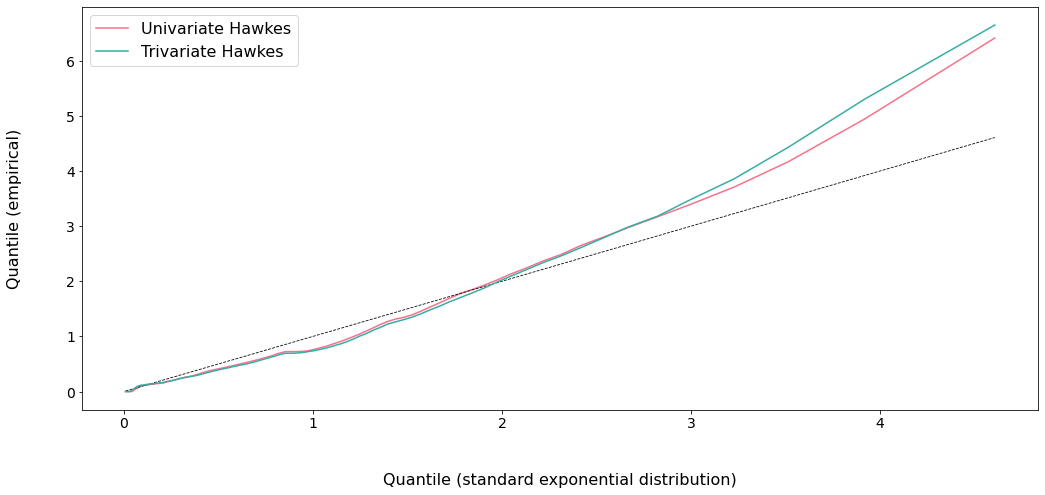

In [206]:
model_labels = ['Univariate Hawkes', 'Trivariate Hawkes']
fig, fig_array = mpoints.plot_tools.qq_plot([residuals_univariate_hawkes, residuals_trivariate_hawkes], shape=(1, 1),
                                    model_labels=model_labels,
                                    figsize=(16, 8), left=0.085, right=0.915, bottom=0.15, top=0.85)

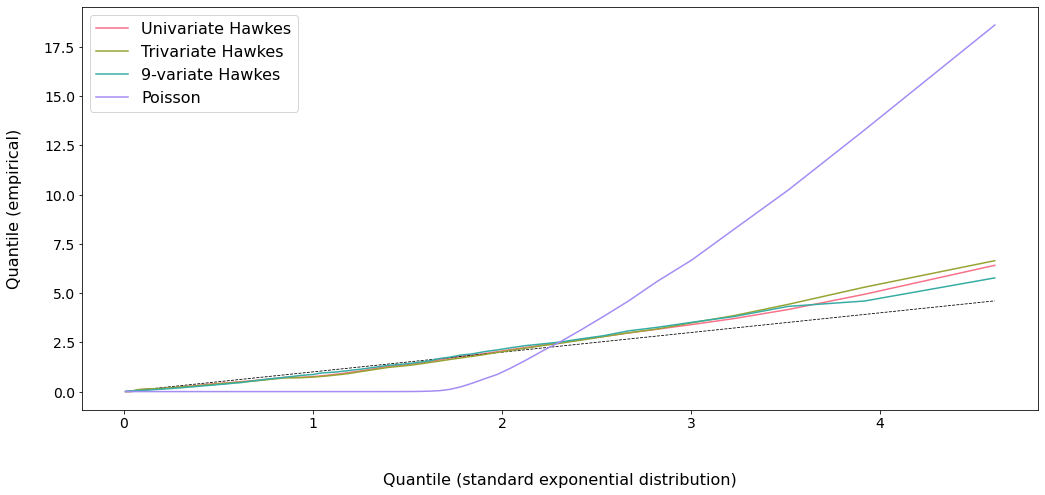

In [204]:
model_labels = ['Univariate Hawkes', 'Trivariate Hawkes', '9-variate Hawkes', 'Poisson']
fig, fig_array = mpoints.plot_tools.qq_plot([residuals_univariate_hawkes, residuals_trivariate_hawkes, residuals_9variate_hawkes, residuals_poisson], shape=(1, 1),
                                    model_labels=model_labels,
                                    figsize=(16, 8), left=0.085, right=0.915, bottom=0.15, top=0.85)

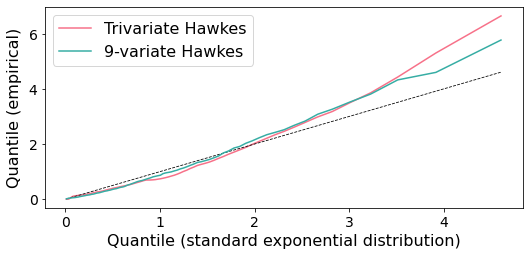

In [98]:
model_labels = ['Trivariate Hawkes', '9-variate Hawkes']
fig, fig_array = mpoints.plot_tools.qq_plot([residuals_trivariate_hawkes, residuals_9variate_hawkes], shape=(1, 1),
                                    model_labels=model_labels,
                                    figsize=(8, 4), left=0.085, right=0.915, bottom=0.15, top=0.85)

In [213]:
n_events = 3  # number of event types, $d_e$
n_states = 3  # number of possible states, $d_x$
events_labels = ['SELL','MID','BUY']  # names of the event types
states_labels = ['BUYPRESSURE','BALANCED','SELLPRESSURE']#['1', '2']  # names of the states
model = mpoints.hybrid_hawkes_exp.HybridHawkesExp(n_events, n_states, events_labels, states_labels)


times = (df.index.to_series() - datetime.datetime(1970,1,1)).dt.total_seconds()
events = np.sign(df.PRICE-df.MID).astype(int)+1
states = np.sign(df.BIDSIZ-df.ASKSIZ).astype(int)+1
time_start=int(times.min()/60/60)*60*60#1672740000
time_end=(int(times.max()/60/60)+1)*60*60#1672754400
assert (times>time_start).all()
assert (times<time_end).all()

result, _, _ = model.estimate_hawkes_parameters(times.values, events.values, states.values, time_start=time_start, time_end=time_end)
print(result)
model.set_hawkes_parameters(*model.array_to_parameters(result.x, n_events, n_states))

residuals_trivariate_hawkes_3state = model.compute_events_residuals(times.values, events.values, states.values, time_start)

       fun: -252197.74155857833
     hesss: []
      jacs: [array([ 7.64130431e-02,  2.38959069e-04,  9.08047837e-04,  7.42066898e-04,
        1.34998598e-03, -6.43273829e-04, -5.84482527e-05, -5.74545495e-04,
        1.22732884e-02, -1.10109839e-02, -4.50102890e-05,  1.58574961e-04,
        8.03345184e-05, -2.01910339e-03,  3.18980808e-05,  1.67090353e-04,
       -4.26346688e-04, -3.61100050e-04,  5.13577318e-03]), array([ 8.43118265e-02, -7.60301952e-05, -3.30183043e-05, -2.99695759e-06,
       -2.81518591e-05, -3.35118042e-04,  3.39311918e-07,  3.81622393e-03,
       -1.36596548e-04, -1.07265076e-03,  2.65214122e-05,  1.18897527e-05,
       -7.77505238e-07,  7.83218063e-07, -3.15155636e-04,  7.03883072e-04,
        4.82049497e-04, -1.33023605e-04, -1.16709624e-03]), array([-3.31013671e-01, -2.22704232e-03,  7.08496064e-07,  9.33806571e-06,
        1.16020894e-02,  6.92901183e-04, -4.62403860e-08, -1.91511451e-05,
        7.85761736e-04, -9.87438444e-05, -6.14758632e-05, -4.69824639e

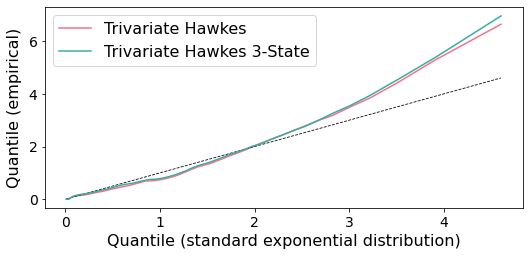

In [130]:
model_labels = ['Trivariate Hawkes', 'Trivariate Hawkes 3-State']
fig, fig_array = mpoints.plot_tools.qq_plot([residuals_trivariate_hawkes, residuals_trivariate_hawkes_3state], shape=(1,1),
                                    model_labels=model_labels,
                                    figsize=(8, 4), left=0.085, right=0.915, bottom=0.15, top=0.85)

In [214]:
n_events = 3  # number of event types, $d_e$
n_states = 3  # number of possible states, $d_x$
events_labels = ['SELL','MID','BUY']  # names of the event types
states_labels = [*range(n_states)]#['1', '2']  # names of the states
model = mpoints.hybrid_hawkes_exp.HybridHawkesExp(n_events, n_states, events_labels, states_labels)

times = (df.index.to_series() - datetime.datetime(1970,1,1)).dt.total_seconds()
events = np.sign(df.PRICE-df.MID).astype(int)+1
states = pd.qcut((df.BIDSIZ-df.ASKSIZ)/(df.BIDSIZ+df.ASKSIZ),q=n_states)
states = pd.DataFrame(states.rename('s')).groupby('s').s.ngroup()
time_start=int(times.min()/60/60)*60*60#1672740000
time_end=(int(times.max()/60/60)+1)*60*60#1672754400
assert (times>time_start).all()
assert (times<time_end).all()

result, _, _ = model.estimate_hawkes_parameters(times.values, events.values, states.values, time_start=time_start, time_end=time_end)
print(result)
model.set_hawkes_parameters(*model.array_to_parameters(result.x, n_events, n_states))

residuals_trivariate_hawkes_binstate = model.compute_events_residuals(times.values, events.values, states.values, time_start)

       fun: -185757.7408343885
     hesss: []
      jacs: [array([-1.84546272e-03, -6.18156906e-09,  1.30184272e-07,  6.40020852e-07,
        2.02748600e-09, -3.42545730e-07,  1.09882325e-05,  2.83548473e-09,
       -3.12469967e-07, -1.11425302e-06, -8.26900917e-09,  9.10885378e-09,
       -1.00727575e-08,  1.50179660e-09,  5.96881510e-07, -7.12387518e-07,
        1.81197797e-09,  7.17407726e-07, -3.81424610e-08]), array([-3.74612477e+03, -1.58534377e+04, -7.35233072e+01,  2.94705254e+00,
       -1.21986876e+02,  1.21720961e+02,  5.82456210e+00, -5.50490026e+01,
       -5.77684720e+00, -2.39693338e+02,  1.01010287e-02, -1.12828598e+02,
       -2.47528851e+00, -5.32950231e+00, -4.92438110e+02, -1.60098843e+01,
       -3.31966036e-08, -8.63913144e+01, -8.75613250e+00]), array([ 5.54250382e+01,  9.37711075e-03, -1.30279636e-01, -3.87829966e-04,
       -7.62343365e-05,  2.75919780e-02, -2.01158836e-03, -9.53989348e-05,
        2.39310233e-02, -7.63074382e-04, -4.81732047e-04, -1.05767497e-

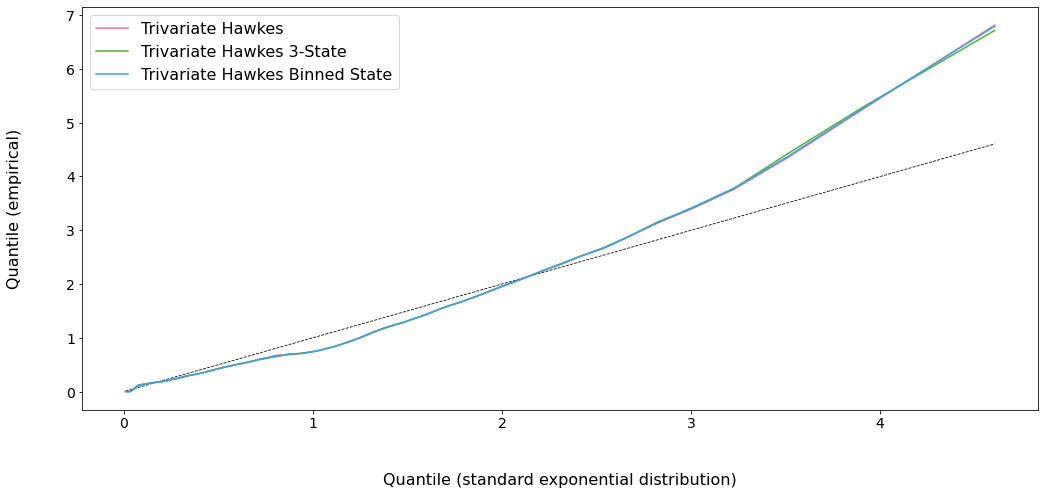

In [215]:
model_labels = ['Trivariate Hawkes', 'Trivariate Hawkes 3-State', 'Trivariate Hawkes Binned State']
fig, fig_array = mpoints.plot_tools.qq_plot([residuals_trivariate_hawkes, residuals_trivariate_hawkes_3state, residuals_trivariate_hawkes_binstate], shape=(1,1),
                                    model_labels=model_labels,
                                    figsize=(16, 8), left=0.085, right=0.915, bottom=0.15, top=0.85)

In [ ]:
model_labels = ['Trivariate Hawkes', 'Trivariate Hawkes 3-State', 'Trivariate Hawkes Binned State']
fig, fig_array = mpoints.plot_tools.qq_plot([residuals_trivariate_hawkes, residuals_trivariate_hawkes_3state, residuals_trivariate_hawkes_binstate], shape=(1,1),
                                    model_labels=model_labels,
                                    figsize=(16, 8), left=0.085, right=0.915, bottom=0.15, top=0.85)

In [144]:
import scipy as sp

In [218]:
import statsmodels

In [227]:
1/np.sqrt(events.shape[0])

0.005050440638602785

In [234]:
import statsmodels.stats.diagnostic

In [235]:
?statsmodels.stats.diagnostic.acorr_ljungbox

In [236]:
statsmodels.stats.diagnostic.acorr_ljungbox(statsmodels.tsa.stattools.acf(residuals_univariate_hawkes[0])[1:])

,lb_stat,lb_pvalue
1,8.206336,0.004174
2,11.251220,0.003604
3,11.585456,0.008947
4,12.762007,0.012499
5,14.368074,0.013433
6,15.117829,0.019360
7,16.416706,0.021570
8,17.106779,0.029016
9,18.087291,0.034174


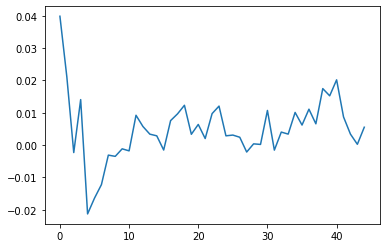

In [225]:
plt.plot(statsmodels.tsa.stattools.acf(residuals_univariate_hawkes[0])[1:])

In [203]:
sum(sp.stats.expon.logpdf(np.clip(np.concatenate(residuals_univariate_hawkes),0,None)))

-39136.5470930382

In [197]:
sum(sp.stats.expon.logpdf(np.clip(np.concatenate(residuals_trivariate_hawkes),0,None)))

-39191.68486312266

In [198]:
sum(sp.stats.expon.logpdf(np.clip(np.concatenate(residuals_trivariate_hawkes_3state),0,None)))

-39387.471770565484

In [202]:
sum(sp.stats.expon.logpdf(np.clip(np.concatenate(residuals_trivariate_hawkes_binstate),0,None)))

-36808.60844022951

- AIC,BIC
- EM
- Write up parameter estimates in a table